# TP1 de robótica
Caio Teles Cunha 2020006434


Ivan Vilaça 2021421931

## Questão 1
Anexado a Cena junto do notebook

## Questão 2
W é o referencial do mundo


P é o referencial da planta


R é o referencial do robô


C e C1 são os referenciais das cadeiras


H e H1 são os referenciais das pessoas


M é o referencial da mesa


Twp é a transformada do mundo para planta


Twr é a transformada do mundo para o robô


Trc1 é a transformada do robô para a cadeira 1


Tpm é a transformada da planta para a mesa


Tpc é a transformada da planta para a cadeira


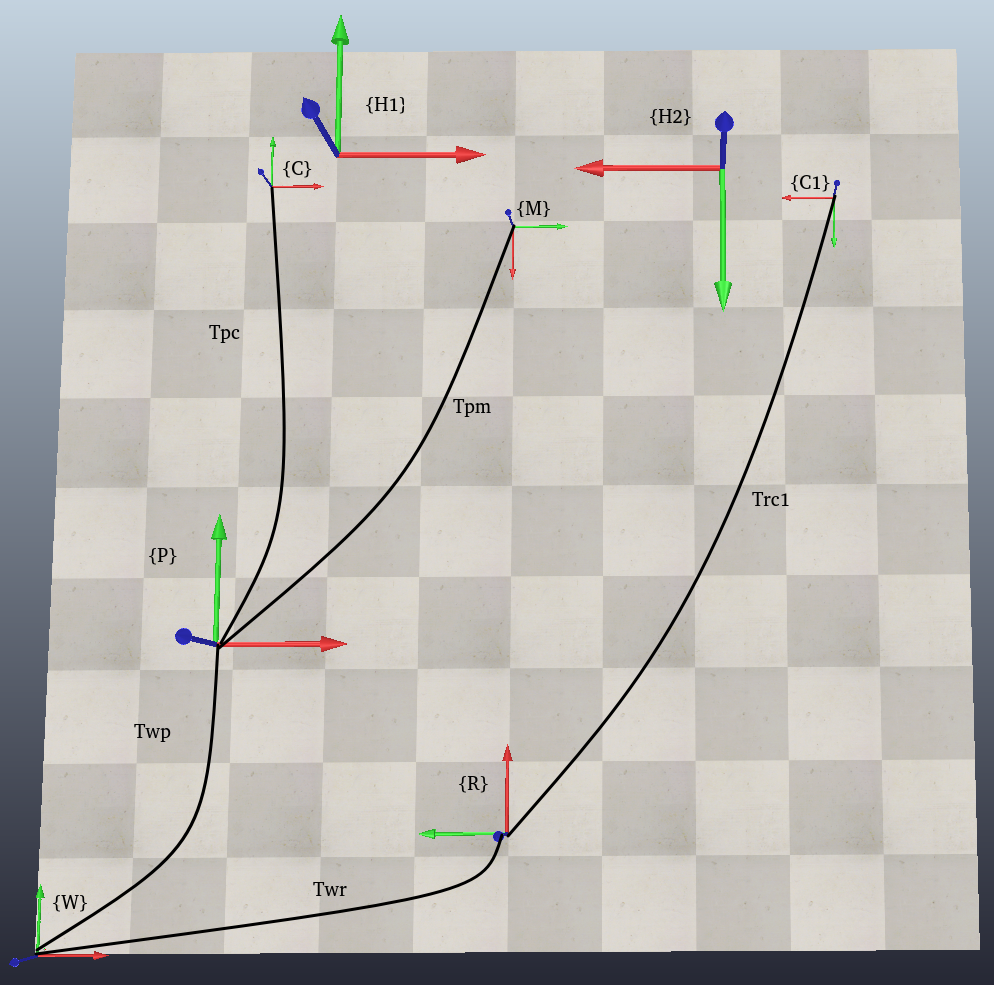

## Questão 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from coppeliasim_zmqremoteapi_client import RemoteAPIClient

In [2]:

def Rx(theta):
 
    return np.array([[  1, 0            , 0           ],
                      [ 0, np.cos(theta),-np.sin(theta)],
                      [ 0, np.sin(theta), np.cos(theta)]])
  
def Ry(theta):
 
    return np.array([[  np.cos(theta), 0, np.sin(theta)],
                      [ 0            , 1, 0           ],
                      [-np.sin(theta), 0, np.cos(theta)]])


def Rz(theta):
  
    return np.array([[ np.cos(theta), -np.sin(theta), 0 ],
                      [ np.sin(theta), np.cos(theta) , 0 ],
                      [ 0            , 0             , 1 ]])

# Plota um referencial no plano
def plot_frame(Porg, R, c=None):

    axis_size = 1.0    
    axes = axis_size*R
    
    x_axis = np.array(axes[0:2,0])
    y_axis = np.array(axes[0:2,1])
    
    if c == None:
        c = ['r', 'g']
    
    # X
    plt.quiver(*Porg[0:2], *x_axis, color=c[0], angles='xy', scale_units='xy', scale=1)
    
    # Y
    plt.quiver(*Porg[0:2], *y_axis, color=c[1], angles='xy', scale_units='xy', scale=1)
    


### Função para obter posição, angulos de euler e plotar referenciais

In [3]:
def getPosition(handleObject):
    position = sim.getObjectPosition(handleObject)
    position = np.array(position)
    return position

In [4]:
def getEulerAngles(handleObject):
    eulerAngles = sim.getObjectOrientation(handleObject)
    eulerAngles = np.array(eulerAngles)
    return eulerAngles

In [5]:
def getRelativePosition(handleObject,handleReference):
    position = sim.getObjectPosition(handleObject,handleReference)
    position = np.array(position)
    return position

In [6]:
def getRelativeEulerAngles(handleObject,handleReference):
    eulerAngles = sim.getObjectOrientation(handleObject,handleReference)
    eulerAngles = np.array(eulerAngles)
    return eulerAngles

In [7]:
def plotFrame(position,eulerAngles):
    # Frame Object
    Porg = np.array(position)    
    R = Rz(eulerAngles[2])
    plot_frame(Porg, R)

In [8]:
# (firstFrame -> second frame)
# T (secondFrame,fistFrame)
# Ao multiplicar um ponto do primeiro frame, ele se transforma em um ponto em relação
# ao segundo frame
def getTransformationMatrix(fistFrameHandle,secondFrameHandle):

    fistFramePosition = getRelativePosition(fistFrameHandle,secondFrameHandle)
    fistFrameOrientation = getRelativeEulerAngles(fistFrameHandle,secondFrameHandle)

    Rsf = Rz((fistFrameOrientation[2]))

    # Concatena o vetor origem ao final (coluna)
    Tsf = np.column_stack((Rsf, fistFramePosition))
    # Concatena o vetor auxiliar embaixo (linha)
    aux = np.array([0, 0, 0, 1])
    Tsf = np.row_stack((Tsf, aux))

    return Tsf
    

### Resposta da Questão

Program started
Program ended


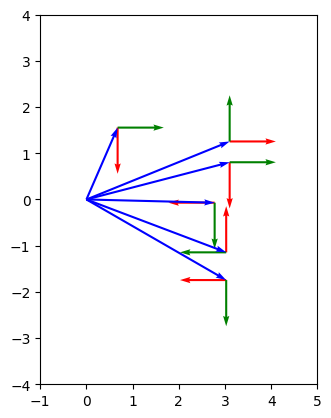

In [9]:
print ('Program started')
client = RemoteAPIClient()
sim = client.require('sim')
sim.startSimulation()

# Handle do Robo
robotHandle = sim.getObject("/Pioneer_p3dx")
# World Handle 
worldHandle = sim.handle_world

# Faz a matriz de transformação
Tur = getTransformationMatrix(robotHandle,worldHandle)

# Inverte para conseguir a transformada do mundo para o robô
Tru = np.linalg.inv(Tur)

# Com a matriz de transformação pronta basta multiplica-la pela posição dos outros
# objetos da cena (lembrando de concatenar 1 no final)

# Frame da planta
plantHandle = sim.getObject("/indoorPlant")
plantPosition = getPosition(plantHandle)
plantPosition = np.append(plantPosition,1)

plantPosition = Tru @ plantPosition

# Orientação da planta em relação ao robo
plantOrientation = getRelativeEulerAngles(plantHandle,robotHandle)

# Matriz de rotação da planta em relação ao robo
Rrp = Rz((plantOrientation[2]))

# usaremos a origem do sistema de coordenadas como a origem do nosso frame do robô
pr_org = np.array([0, 0])

plt.figure()
plot_frame(plantPosition[:3], Rrp)

# Vetor da origem do robô para a planta
plt.quiver(*pr_org[:2], *plantPosition[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Fazendo o mesmo para todos os outros objetos

# Referencial cadeira [0]
chairHandle = sim.getObject("/diningChair{0}")
chairPosition = getPosition(chairHandle)
chairPosition = np.append(chairPosition,1)
chairPosition = Tru @ chairPosition

chairOrientation = getRelativeEulerAngles(chairHandle,robotHandle)
Rrc = Rz((chairOrientation[2]))

plot_frame(chairPosition[:3], Rrc)

plt.quiver(*pr_org[:2], *chairPosition[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial cadeira [1]
chairOneHandle = sim.getObject("/diningChair{1}")
chairOnePosition = getPosition(chairOneHandle)
chairOnePosition = np.append(chairOnePosition,1)
chairOnePosition = Tru @ chairOnePosition

chairOneOrientation = getRelativeEulerAngles(chairOneHandle,robotHandle)
Rrc = Rz((chairOneOrientation[2]))

plot_frame(chairOnePosition[:3], Rrc)
plt.quiver(*pr_org[:2], *chairOnePosition[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial mesa
diningTableHandle = sim.getObject("/diningTable")

diningTablePosition = getPosition(diningTableHandle)
diningTablePosition = np.append(diningTablePosition,1)
diningTablePosition = Tru @ diningTablePosition

diningTableOrientation = getRelativeEulerAngles(diningTableHandle,robotHandle)
Rrd = Rz((diningTableOrientation[2]))

plot_frame(diningTablePosition[:3], Rrd)
plt.quiver(*pr_org[:2], *diningTablePosition[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial pessoa
humanHandle = sim.getObject("/Bill{0}")

humanPosition = getPosition(humanHandle)
humanPosition = np.append(humanPosition,1)
humanPosition = Tru @ humanPosition

humanOrientation = getRelativeEulerAngles(humanHandle,robotHandle)
Rrd = Rz((humanOrientation[2]))

plot_frame(humanPosition[:3], Rrd)
plt.quiver(*pr_org[:2], *humanPosition[:2], color='b', angles='xy', scale_units='xy', scale=1)

# Referencial pessoa{1}
humanOneHandle = sim.getObject("/Bill{1}")

humanOnePosition = getPosition(humanOneHandle)
humanOnePosition = np.append(humanOnePosition,1)
humanOnePosition = Tru @ humanOnePosition

humanOneOrientation = getRelativeEulerAngles(humanOneHandle,robotHandle)
Rrd = Rz((humanOneOrientation[2]))

plot_frame(humanOnePosition[:3], Rrd)
plt.quiver(*pr_org[:2], *humanOnePosition[:2], color='b', angles='xy', scale_units='xy', scale=1)

plt.axis('scaled')
plt.axis((-1, 5, -4, 4))

    
sim.stopSimulation()
print ('Program ended')

Decidi colocar o plot como o frame do robô. Todos os centros de outros frames são transformadas do robô para o frame do respectivo objeto. Como existem 6 objetos na cena foram plotados todos os referenciais. Note que a orientação foi obtida diretamente do coppelia. Decidi tambem não colocar a tranformação em relação ao z, já que seria dificil de plotar e a maioria dos objetos tem seu referêncial próximo ao chão.

## Questão 4

Fazer o mesmo da questão 3, mas com o robô em 3 posições diferentes. Alterei as posições dentro do coppelia e plotei uma de cada vez.

### Posição 1

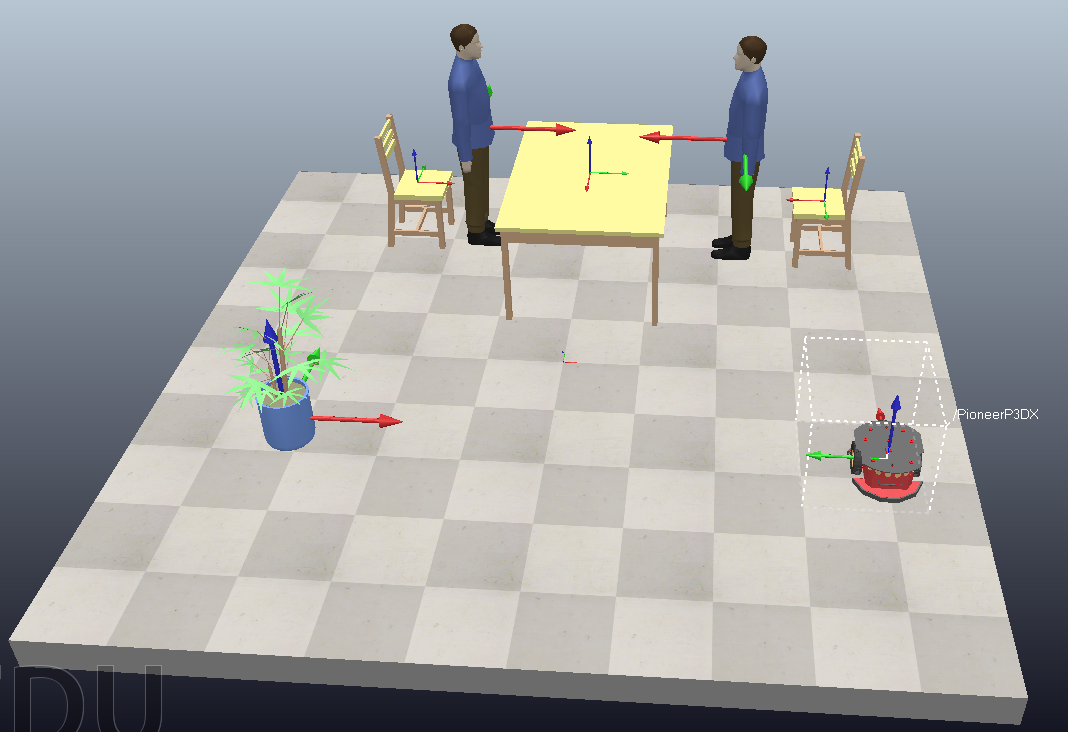


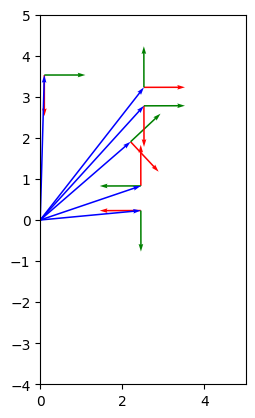



### Posição 2

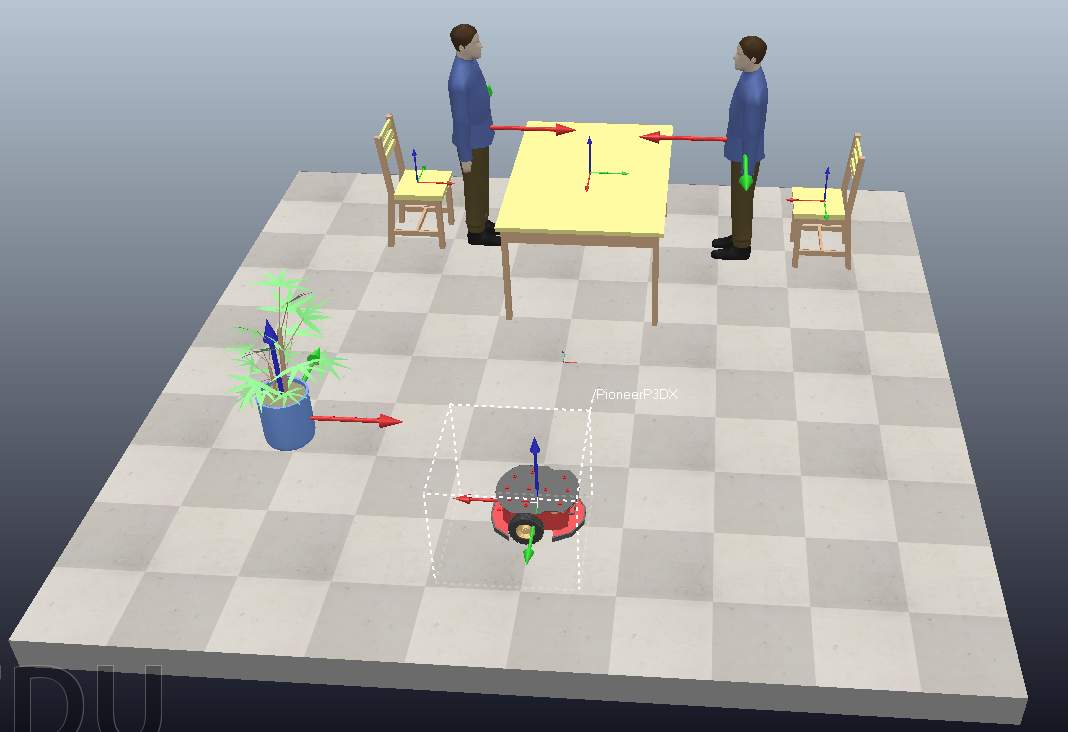


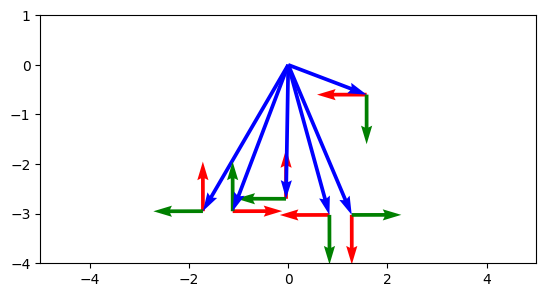

### Posição 3

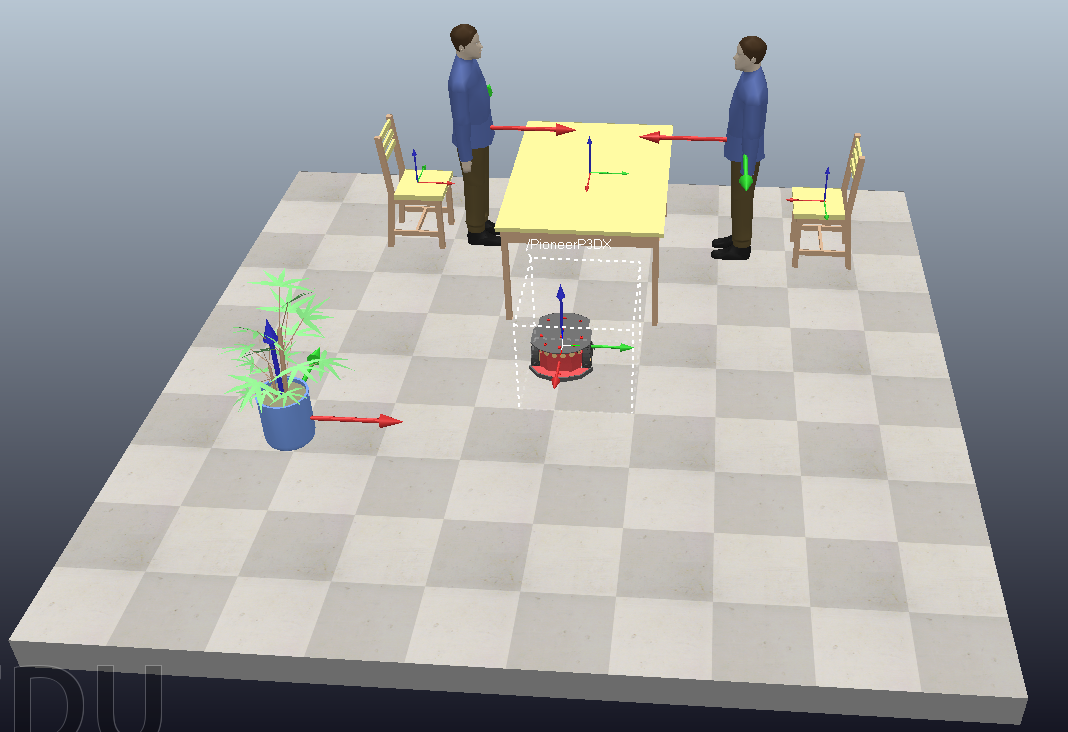


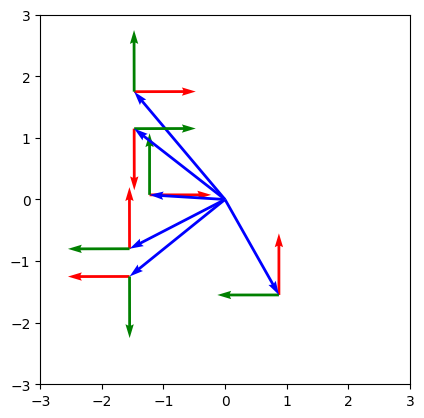

## Questão 5

Aqui eu alterei as funções dos notebooks do professor para a api nova. E acrescentei no draw_laser_data alguns parâmetros que serão importantes para plotar os pontos em relação ao mundo e não em relação ao laser.

In [10]:
# atualizando para a versão mais nova da API
def readSensorData(range_data_signal_id="hokuyo_range_data", angle_data_signal_id="hokuyo_angle_data"):

    # the first call should be non-blocking to avoid getting out-of-sync angle data
    string_range_data = sim.getStringSignal(range_data_signal_id)

    # the second call should block to avoid out-of-sync scenarios
    # between your python script and the simulator's main loop
    # (your script may be slower than the simulator's main loop, thus
    # slowing down data processing)
    string_angle_data = sim.getStringSignal(angle_data_signal_id)

    # check the if both data were obtained correctly
    if string_angle_data and string_range_data:
        # unpack data from range and sensor messages
        raw_range_data = sim.unpackFloatTable(string_range_data)
        raw_angle_data = sim.unpackFloatTable(string_angle_data)

        return raw_range_data, raw_angle_data

    # return none in case were nothing was gotten from the simulator
    return [],[]

# Usando a transformada para transformar um ponto no referencial do laser para um ponto no referencial do mundo
def draw_laser_data(laser_data,transformation_matrix,robot_position,fig,ax, max_sensor_range=5):
        
    for i in range(len(laser_data)):
        ang, dist = laser_data[i]
        
        # Quando o feixe não acerta nada, retorna o valor máximo (definido na simulação)
        # Logo, usar um pequeno limiar do máximo para considerar a leitura
        if (max_sensor_range - dist) > 0.2:
            x = dist * np.cos(ang)
            y = dist * np.sin(ang)
            c = 'r'
            if ang < 0:    
                c = 'b'
            point_laser = np.array([x,y,0,1])
            point_world = transformation_matrix @ point_laser
            ax.plot(point_world[0], point_world[1], 'o', color=c,markersize = 5)

    # Plotando ele mesmo como um círculo verde
    ax.plot(robot_position[0], robot_position[1], 'go', markersize=5)
        
    ax.grid()
    ax.set_xlim([-max_sensor_range, max_sensor_range])
    ax.set_ylim([-max_sensor_range, max_sensor_range])

(robô → mundo)
[[ 6.47987391e-05 -9.99999998e-01  0.00000000e+00  5.53551417e-03]
 [ 9.99999998e-01  6.47987391e-05  0.00000000e+00 -1.55033416e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.38677026e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(laser → robô)
[[ 1.00000000e+00  1.73266909e-17  0.00000000e+00  0.00000000e+00]
 [-1.73266909e-17  1.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  1.50000006e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
(mundo → laser)
[[ 6.47987391e-05 -9.99999998e-01  0.00000000e+00  5.53551417e-03]
 [ 9.99999998e-01  6.47987391e-05  0.00000000e+00 -1.55033416e+00]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00  2.88677031e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Program ended


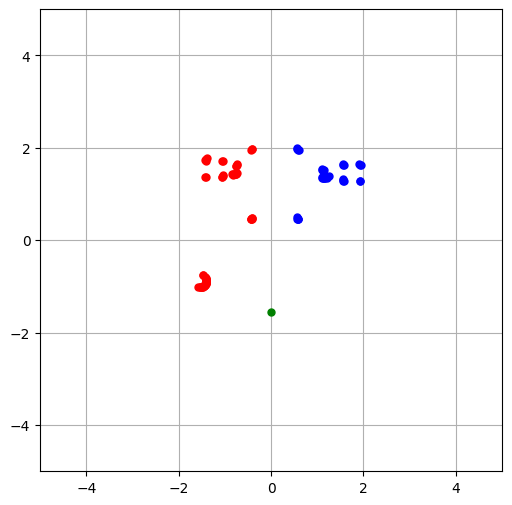

In [11]:
client = RemoteAPIClient()
sim = client.getObject('sim')

sim.startSimulation()

# Handle do Robo
robotHandle = sim.getObject("/Pioneer_p3dx")
robotPosition = getPosition(robotHandle)
# World Handle 
worldHandle = sim.handle_world

# Faz a matriz de transformação
Tur = getTransformationMatrix(robotHandle,worldHandle)

print("(robô → mundo)")
print(Tur)

# Handle Laser
laserHandle = sim.getObject("/Pioneer_p3dx/fastHokuyo")
Trl = getTransformationMatrix(laserHandle,robotHandle)

print("(laser → robô)")
print(Trl)

Tul = Tur @ Trl
print("(mundo → laser)")
print(Tul)


# Handle para os dados do LASER
laser_range_data = "hokuyo_range_data"
laser_angle_data = "hokuyo_angle_data"

# Prosseguindo com as leituras
raw_range_data = [] 
raw_angle_data = []
while len(raw_range_data) == 0 and len(raw_angle_data) == 0:
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
laser_data = np.array([raw_angle_data, raw_range_data]).T

fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, aspect='equal')
draw_laser_data(laser_data,Tul,robotPosition,fig,ax)

plt.axis('scaled')
plt.axis((-5, 5, -5, 5))

sim.stopSimulation()



print ('Program ended')

### Posição 1

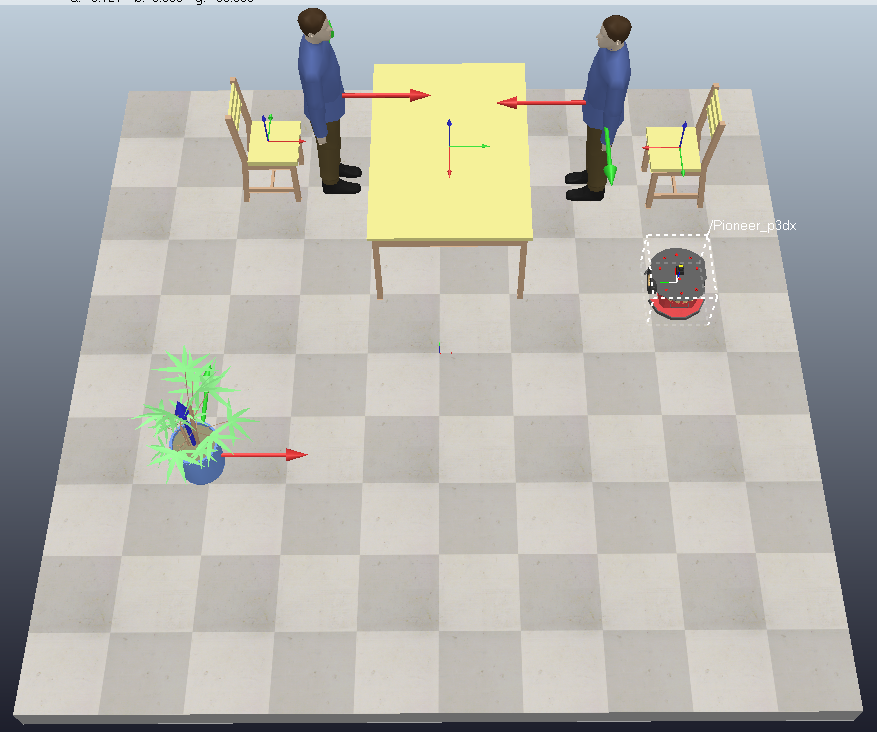


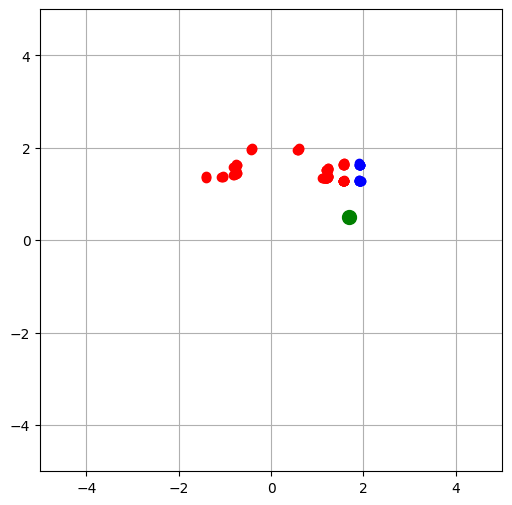

### Posição 2

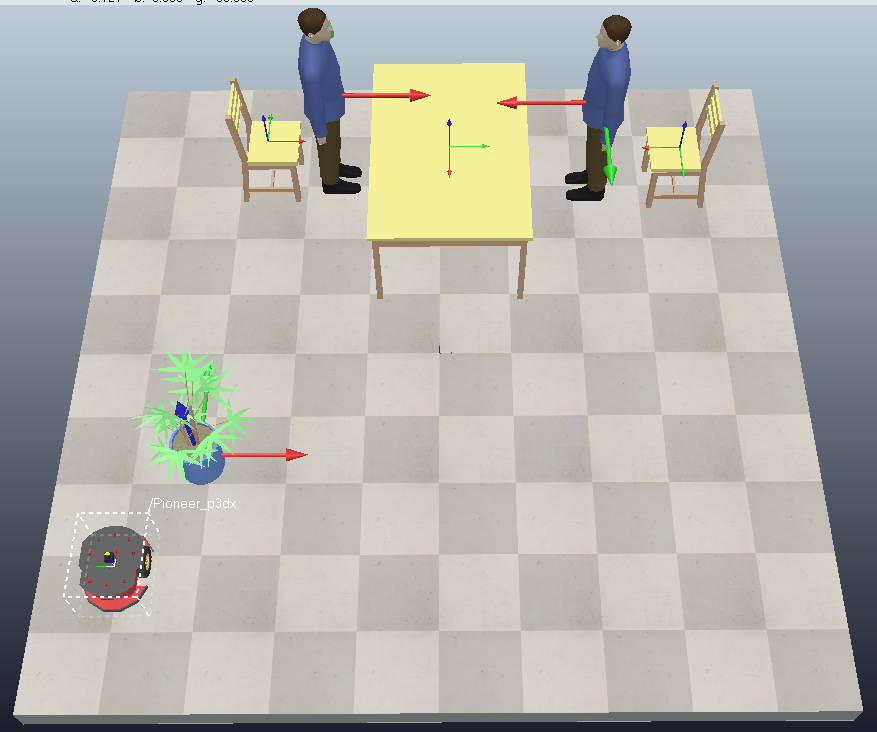


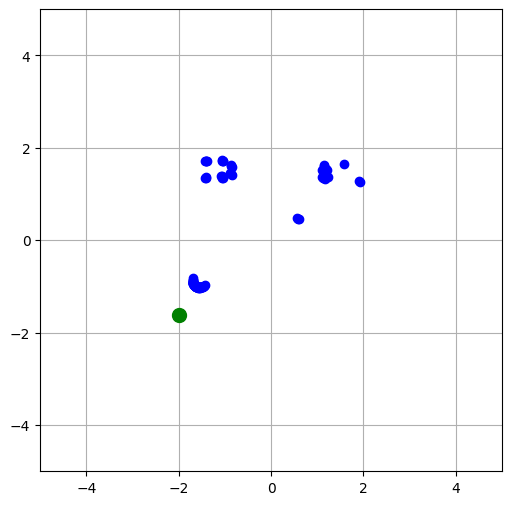

### Posição 3

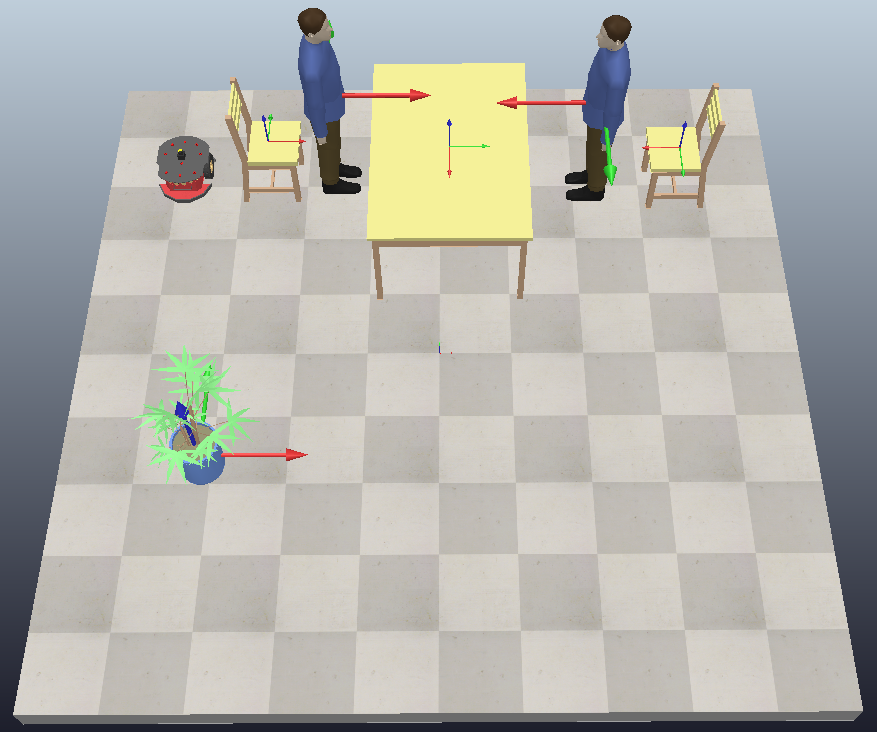


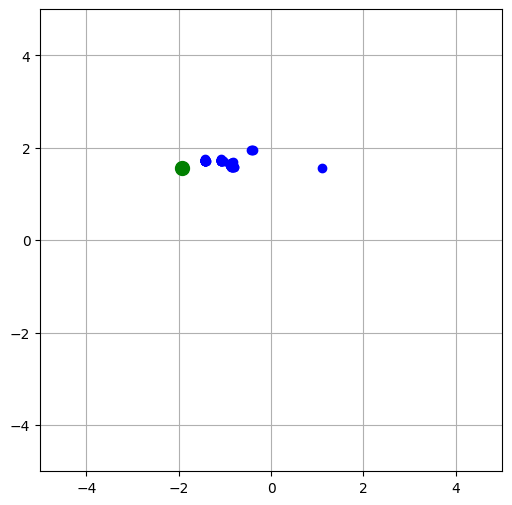

## Questão 6

Para a questão 6, bastou utilizar os métodos do professor (tomando o cuidado de alterar tudo para a API nova) e plotar os pontos que representam a posição do robô em relação ao tempo. Plotei esses pontos como bolinhas verdes no plot.

Program ended


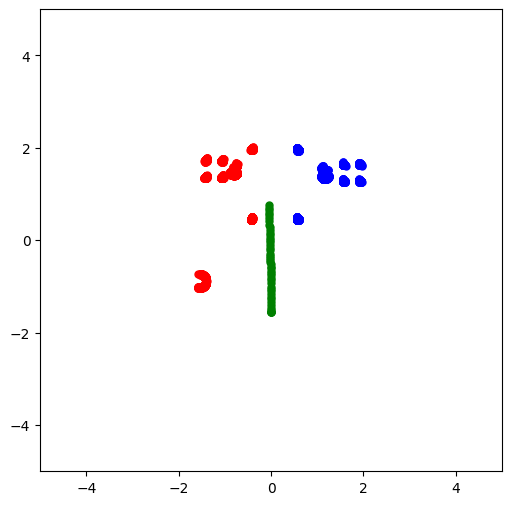

In [12]:
# Alterando o script original para a nova api
client = RemoteAPIClient()
sim = client.getObject('sim')

sim.startSimulation()

#Figura do plot
fig = plt.figure(figsize=(6,6), dpi=100)
ax = fig.add_subplot(111, aspect='equal')

# Handle para as juntas das RODAS
l_wheel = sim.getObject("/Pioneer_p3dx/Pioneer_p3dx_leftMotor")
r_wheel = sim.getObject("/Pioneer_p3dx/Pioneer_p3dx_rightMotor")

# Handle do Robo
robotHandle = sim.getObject("/Pioneer_p3dx")

# Esse ponto é a posição do robô em relação ao mundo
robotPosition = getPosition(robotHandle)

# World Handle 
worldHandle = sim.handle_world

# Faz a matriz de transformação
Tur = getTransformationMatrix(robotHandle,worldHandle)

# Handle Laser
laserHandle = sim.getObject("/Pioneer_p3dx/fastHokuyo")
Trl = getTransformationMatrix(laserHandle,robotHandle)

laser_range_data = "hokuyo_range_data"
laser_angle_data = "hokuyo_angle_data"

Tul = Tur @ Trl

raw_range_data = [] 
raw_angle_data = []
# Prosseguindo com as leituras
# Garantir uma leitura válida
while len(raw_range_data) == 0 and len(raw_angle_data) == 0:
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)

laser_data = np.array([raw_angle_data, raw_range_data]).T

draw_laser_data(laser_data,Tul,robotPosition,fig,ax)

raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
laser_data = np.array([raw_angle_data, raw_range_data]).T

draw_laser_data(laser_data,Tul,robotPosition,fig,ax)

# Dados do Pioneer
L = 0.381   # Metros
r = 0.0975  # Metros

t = 0
while (t := sim.getSimulationTime()) < 10:

    # Fazendo a leitura da posição
    # Esse ponto é a posição do robô em relação ao mundo
    robotPosition = getPosition(robotHandle)
    robotPosition = np.array(robotPosition)

    # Faz a matriz de transformação
    Tur = getTransformationMatrix(robotHandle,worldHandle)
    Trl = getTransformationMatrix(laserHandle,robotHandle)
    Tul = Tur @ Trl

    # Fazendo leituras do laser
    raw_range_data, raw_angle_data = readSensorData(laser_range_data, laser_angle_data)
    laser_data = np.array([raw_angle_data, raw_range_data]).T

    draw_laser_data(laser_data,Tul,robotPosition,fig,ax)
    # Velocidade básica (linear, angular)
    v = 0
    w = np.deg2rad(0)

    frente = int(len(laser_data)/2)
    lado_direito = int(len(laser_data)*1/4)
    lado_esquerdo = int(len(laser_data)*3/4)

    
    if laser_data[frente, 1] > 2:
        v = .25
        w = 0
    elif laser_data[lado_direito, 1] > 2:
        v = 0
        w = np.deg2rad(-30)
    elif laser_data[lado_esquerdo, 1] > 2:
        v = 0
        w = np.deg2rad(30)
    
    wl = v/r - (w*L)/(2*r)
    wr = v/r + (w*L)/(2*r)
    
    # Enviando velocidades
    sim.setJointTargetVelocity(l_wheel, wl)
    sim.setJointTargetVelocity(r_wheel, wr)
    sim.step()

# Parando o robô    
sim.setJointTargetVelocity(r_wheel, 0)
sim.setJointTargetVelocity(l_wheel, 0)        
   
# Parando a simulação     
sim.stopSimulation()

print ('Program ended')

## Conclusão

Encontramos bastante dificuldade em entender as transformadas inicialmente devido à algumas confusões em relação à forma de nomear. Transformar as funções para a api nova também foi um desafio, já que não encontramos a página com todas as funções no site do coppelia, então tivemos que procurar uma por uma. No entanto, passar para a API nova trouxe uma grande vantagem que é poder pegar os pontos no referênciais de outros objetos, o que possibilitou testar nossas contas com as transformadas de maneira simples e rápida. Em geral, o trabalho foi uma ótima forma de consolidar os conhecimentos aprendidos em sala de aula sobre as tranformadas e deixar mais claro a sua utilização.